# Solar Cell

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import photovoltaic as pv

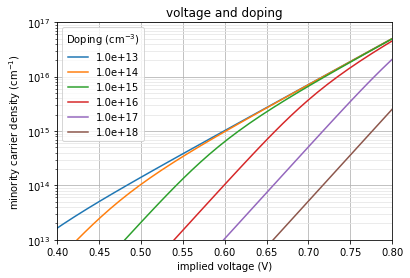

In [4]:
plt.figure()
plt.semilogy()
plt.xlim(0.4, 0.8)
plt.ylim(1e13, 1e17)
plt.ylabel('minority carrier density (cm$^{-1}$)')
plt.xlabel('implied voltage (V)')
plt.title('voltage and doping')
plt.grid(b=True, which='major', color='0.7', linestyle='-')
plt.grid(b=True, which='minor', color='0.9', linestyle='-')

Δn = np.logspace(13, 20)
dopings = (1e13, 1e14, 1e15, 1e16, 1e17, 1e18)
for doping in dopings:
    impliedV = pv.cell.impliedV(Δn, doping)
    plt.plot(impliedV, Δn, label='{:.1e}'.format(doping))

plt.legend(loc='upper left', title='Doping (cm$^{-3}$)')
plt.savefig('plot_doping_impliedV.png')
plt.show()